# Notebook d'aide et correction pour la séance EPU MAM4 Biomaths

*séance du 21/03/2022*

*Ludovic Mailleret, Mars 2022*

## Populations isolées : le modèle de Malthus

Nous considérons le modèle de croissance de population suivant:
$$\dot x = (n-m) x$$

Vous trouverez dans ce qui suit le script complet de ce que nous avons vu, pas par pas, dans les sections précédentes.

### Définition des conditions initiales, des paramètres, du modèle et simulation de celui-ci

In [1]:
# on nettoie l'espace de travail

%reset -f

In [2]:
# import des modules numpy, matplotlib et de la fonction odeint depuis scipy

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

Nous définissons les conditions initiales et les paramètres et les encapsulons dans des `array`:

In [3]:
# densité initiale de la population
x0 = 0.1

# encapsulation de la densité initiale
etat0_malthus = np.array([x0])


# paramètres du modèle
# taux de natalité
n = 3.0

# taux de mortalité
m = 2.0

# encapsulation des paramètres dans un array
params_malthus = np.array([n, m])

Nous définissons ensuite les paramètres liés aux temps d'intégration `tspan` de l'équation différentielle:

In [4]:
# temps d'intégration
# definition des paramètres du tspan
t_0 = 0.0           # temps initial
t_fin = 20.0        # temps final
pas_t = 0.01        # pas de temps de récupération des variables entre t_0 et t_fin

# définition du tspan
tspan = np.arange(t_0, t_fin, pas_t)

Nous définissons maintenant le modèle proprement dit, c'est à dire une fonction qui renvoit la valeur de la dérivée de(s) la(es) variable(s) d'état en fonction de la valeur de l'état, du temps et des paramètres :

In [5]:
# définition du modèle de Malthus

def modele_malthus(etat, t, params): 
    x = etat              # on recupere l'etat
    n, m = params     # on récupère les paramètres que l'on assigne à des paramètres locaux à la fonction
                          # on fera bien attention à l'ordre des paramètres défini plus haut dans l'encapsulation
    xdot = (n-m)*x    # on calcule la derivee de l'etat 
    return xdot           # on renvoie la derivée calculée

On passe à l'intégration proprement dite en utilisant la fonction `odeint()` :

In [6]:
# intégration du modèle
int_malthus = odeint(modele_malthus, etat0_malthus, tspan, args=(params_malthus,), hmax=pas_t)

L'intégration est faite :

In [7]:
int_malthus

array([[1.00000000e-01],
       [1.01005023e-01],
       [1.02020142e-01],
       ...,
       [4.70826462e+07],
       [4.75558347e+07],
       [4.80337788e+07]])

Il reste maintenant à représenter cette simulation.

### Représentation graphique 

Nous créons une figure et deux systèmes d'axes pour représenter deux sous-figures, puis nous traçons l'évolution de la variable en fonction du temps en échelle linéaire (gauche) ou semi-log (droite).

Vous pouvez découvrir différentes options des méthodes `subplots()`, `plot()`, `legend()`, l'utilisation de LaTeX dans les chaînes de caractères, ou une méthode utile de Python 3 pour compléter les chaines de caractères avec des valeurs via `.format()`

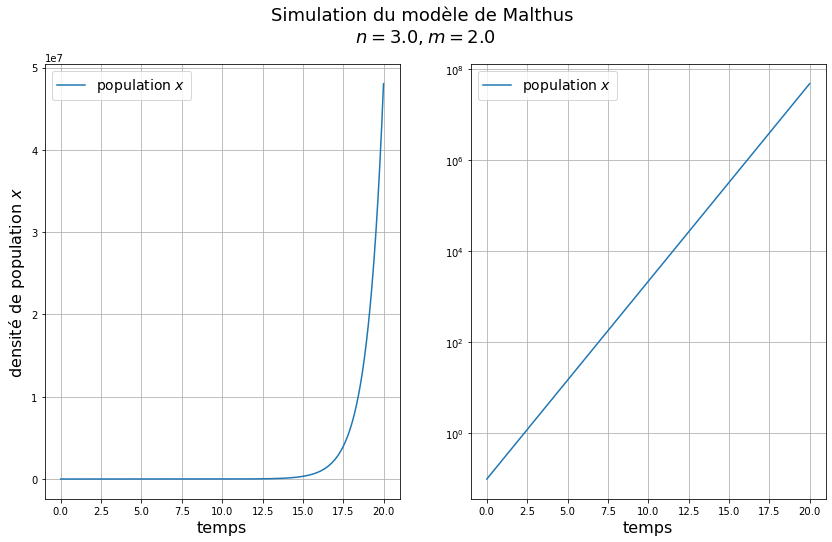

In [8]:
# création d'une figure, et de deux subplots (ax1, ax2)
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))  


# premier subplot
# tracé des simulations par rapport au temps, échelle linéaire
ax1.plot(tspan, int_malthus, color='C0', label='population $x$')
ax1.legend(fontsize='14')

# labellisation des axes
ax1.set_xlabel('temps', fontsize='16')
ax1.set_ylabel('densité de population $x$', fontsize='16')

# titre de la figure
fig1.suptitle('Simulation du modèle de Malthus\n $n = {}, m = {}$'.format(n, m), va='top', fontsize='18')

# modification éventuelle des bornes des axes
ax1.set_ylim(bottom=None, top=None)

# ajout d'une grille
ax1.grid()


## second subplot
# tracé des simulations par rapport au temps, échelle logarithmique
ax2.plot(tspan, int_malthus, color='C0', label='population $x$')
ax2.legend(fontsize='14')

# echelle des ordonnees en log
ax2.set_yscale('log')

# labellisation des axes
ax2.set_xlabel('temps', fontsize='16')

# ajout d'une grille
ax2.grid()

Le cas échéant on peut exporter la figure pour une ré-utilisation dans d'autres logiciels

In [9]:
# export
# permet d'enregistrer la figure fig1 au format png (sans trop d'espace autour)

fig1.savefig('Malthus.png', bbox_inches='tight')

La suite sur les prélèvements dans les modèles avec effets Allee par [ici](./biomaths_mam4_AE.ipynb)